## Import all require library

In [1]:
import mne
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from utility import *

## Loading single edf file
* After it is loaded, it returns mne.io.Raw EDF instances [To see more method/details](https://mne.tools/stable/generated/mne.io.Raw.html)

In [2]:
filename = "EEG_Dataset/00357030/00357030.edf"
raw      = mne.io.read_raw_edf(filename, preload = True)  # Return a raw edf object
df       = raw.to_data_frame() / 1e6                      # Convert to pandas dataframe

Extracting EDF parameters from c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\00357030\00357030.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 646749  =      0.000 ...  2586.996 secs...


In [3]:
df.shape

(646750, 37)

In [4]:
df.columns

Index(['time', 'EEG Fp1-REF', 'EEG Fp2-REF', 'EEG F3-REF', 'EEG F4-REF',
       'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF',
       'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF',
       'EEG T5-REF', 'EEG T6-REF', 'EEG T1-REF', 'EEG T2-REF', 'EEG Fz-REF',
       'EEG Cz-REF', 'EEG Pz-REF', 'EOG_R-REF', 'EOG_L-REF', 'EEG Oz-REF',
       'EEG 25-REF', 'EMG-REF', 'ECG-REF', 'Resp2-REF', 'EEG 24-REF',
       'EEG X4-REF', 'EEG X3-REF', 'Photic-REF', 'RR', 'IBI', 'Bursts',
       'Suppr'],
      dtype='object')

In [5]:
df.head(257)

,time,EEG Fp1-REF,EEG Fp2-REF,EEG F3-REF,EEG F4-REF,EEG C3-REF,EEG C4-REF,EEG P3-REF,EEG P4-REF,EEG O1-REF,...,ECG-REF,Resp2-REF,EEG 24-REF,EEG X4-REF,EEG X3-REF,Photic-REF,RR,IBI,Bursts,Suppr
0,0.000000e+00,0.000013,0.000048,4.612633e-07,0.000101,0.000028,-0.000009,0.000080,-0.000010,0.000004,...,0.004539,3.500000e-09,0.000014,0.000016,0.000020,0.0,-2.592007e-13,-6.214517e-14,-1.153128e-15,-6.214517e-14
1,4.000000e-09,0.000013,0.000048,4.612633e-07,0.000101,0.000028,-0.000009,0.000079,-0.000009,0.000004,...,0.004533,-2.287468e-05,0.000015,0.000016,0.000020,0.0,9.062230e+00,-6.620408e-03,1.845555e-03,7.662533e-02
2,8.000000e-09,0.000014,0.000048,1.224202e-06,0.000101,0.000029,-0.000008,0.000080,-0.000009,0.000005,...,0.004527,-4.400204e-05,0.000015,0.000016,0.000021,0.0,1.794409e+01,-1.326425e-02,3.687633e-03,1.529146e-01
3,1.200000e-08,0.000014,0.000048,1.224202e-06,0.000101,0.000029,-0.000008,0.000080,-0.000009,0.000005,...,0.004521,-6.145573e-05,0.000016,0.000016,0.000021,0.0,2.661631e+01,-1.993025e-02,5.525970e-03,2.288581e-01
4,1.600000e-08,0.000015,0.000015,3.086755e-07,0.000065,-0.000004,0.000006,0.000046,0.000004,0.000013,...,0.004147,-7.378500e-05,-0.000026,-0.000025,-0.000020,0.0,3.505078e+01,-2.661714e-02,7.360303e-03,3.044460e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,1.008000e-06,-0.003565,-0.004109,-1.954493e-03,-0.004116,-0.004030,0.004109,-0.004104,0.004058,0.001811,...,0.003335,3.641475e-03,-0.004124,-0.004126,-0.004134,0.0,-1.165967e+01,1.650166e-02,-3.266239e-03,-1.016058e-01
253,1.012000e-06,-0.003561,-0.004108,-1.952510e-03,-0.004118,-0.004026,0.004104,-0.004105,0.004053,0.001808,...,0.003312,3.626924e-03,-0.004124,-0.004126,-0.004134,0.0,-1.745998e+01,2.475779e-02,-4.897691e-03,-1.521959e-01
254,1.016000e-06,-0.003557,-0.004108,-1.950373e-03,-0.004119,-0.004023,0.004099,-0.004106,0.004049,0.001805,...,0.003393,3.615631e-03,-0.004124,-0.004126,-0.004133,0.0,-2.321045e+01,3.301563e-02,-6.527700e-03,-2.026344e-01
255,1.020000e-06,-0.003553,-0.004107,-1.948542e-03,-0.004119,-0.004019,0.004095,-0.004107,0.004045,0.001803,...,0.003499,3.608173e-03,-0.004123,-0.004126,-0.004133,0.0,-2.888857e+01,4.127383e-02,-8.156016e-03,-2.529139e-01


In [6]:
raw

Measurement date,"June 13, 2023 09:46:26 GMT"
Experimenter,Unknown
Participant,00357030
Digitized points,Not available
Good channels,36 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [7]:
info = raw.info
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-REF, EEG Fp2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 36 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2023-06-13 09:46:26 UTC
 nchan: 36
 projs: []
 sfreq: 250.0 Hz
 subject_info: 6 items (dict)
>


In [8]:
print("We have a total of ", len(info.keys()), "keys, which are:")
print(info.keys())  

We have a total of  36 keys, which are:
dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])


In [9]:
# Print out everythings in the key
list_None = []
list_nothing = []
for key in info.keys():
    if info[key] == None:
        list_None.append(key)
    elif info[key] == []:
        list_nothing.append(key)
    else:
        if key != "subject_info":
            print(f"For key {key} we have:")
            print(info[key])
            print("------------------------------------------------\n")

For key highpass we have:
0.0
------------------------------------------------

For key lowpass we have:
125.0
------------------------------------------------

For key meas_date we have:
2023-06-13 09:46:26+00:00
------------------------------------------------

For key chs we have:
[{'cal': 1.0, 'logno': 1, 'scanno': 1, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'EEG Fp1-REF', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}, {'cal': 1.0, 'logno': 2, 'scanno': 2, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'EEG Fp2-REF', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}, {'cal': 1.0, 'logno': 3, 'scanno': 3, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_nam

In [10]:
print("For each key in list below, we have 'None'\n",list_None,"\n")
print("For each key in list below, we have '[]'  \n",list_nothing,"\n")
print("Total number of useless key:", len(list_None) + len(list_nothing))
print("Total number of useful  key:", len(info.keys()) - len(list_None) - len(list_nothing))

For each key in list below, we have 'None'
 ['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'meas_id', 'proj_id', 'proj_name', 'xplotter_layout', 'gantry_angle'] 

For each key in list below, we have '[]'  
 ['bads', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history'] 

Total number of useless key: 26
Total number of useful  key: 10


In [11]:
print("The edf file is annotated?", len(raw.annotations) != 0)
print(raw.annotations)

The edf file is annotated? True
<Annotations | 81 segments: 1 Hz (2), 10 Hz (2), 11 Hz (2), 13 Hz (2), 15 ...>


<a id = "T2"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
## Useful Keys in edf files

|No|Key|Description|
|:-:|:--|:--|
|1|highpass|Highpass corner frequency in Hertz. Zero indicates a DC recording|
|2|lowpass|Lowpass corner frequency in Hertz. It is automatically set to half the sampling rate if there is otherwise no low-pass applied to the data.|
|3|meas_date|The time (UTC) of the recording.|
|4|__chs__|list of dict about all the channel (details at below) __Main data__|
|5|custom_ref_applied|Whether a custom (=other than average) reference has been applied to the EEG data. This flag is checked by some algorithms that require an average reference to be set.|
|6|sfreq| __s__ampling __freq__uency in Hertz|
|7|dev_head_t|The device to head transformation.|
|8|ch_names|Channel Name|
|9|nchan|Number of channel|

* Description is obtained from [mne.info](https://mne.tools/stable/generated/mne.Info.html#mne.Info)

## Visualize properties for each eeg files

In [12]:
list_info     = []
num_data_list = []
list_directory= []
for patient in os.listdir('EEG_Dataset'):
    for filename in os.listdir(f"EEG_Dataset/{patient}"):
        if filename.endswith(".edf"):
            edf_filename = f"EEG_Dataset/{patient}/" + filename
            raw = mne.io.read_raw_edf(edf_filename, preload = True)  # Return a raw edf object
            list_directory.append(edf_filename)
            list_info.append(raw.info)
            num_data_list.append(raw.n_times)

Extracting EDF parameters from c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\00357030\00357030.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 646749  =      0.000 ...  2586.996 secs...
Extracting EDF parameters from c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\05648564\05648564.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 244999  =      0.000 ...   489.998 secs...
Extracting EDF parameters from c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\05648564\056485641.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 451499  =      0.000 ...   902.998 secs...
Extracting EDF parameters from c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\07328940\073289401.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structur

C:\Users\xinju\AppData\Local\Temp\ipykernel_11512\3371834553.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(edf_filename, preload = True)  # Return a raw edf object


Extracting EDF parameters from c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\36880636\36880636.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 757999  =      0.000 ...  3031.996 secs...
Extracting EDF parameters from c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\36946379\369463791.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1380863  =      0.000 ...  2696.998 secs...
Extracting EDF parameters from c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\36979297\36979297.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1577983  =      0.000 ...  3081.998 secs...
Extracting EDF parameters from c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\36979297\369792972.edf...
EDF file detected
Setting channel info structure...
Creating raw.info struct

In [21]:
information_list = []
key_to_extract   = ["sfreq", "highpass", "lowpass"]
for i, info in enumerate(list_info):
    information_list.append([info[key] for key in key_to_extract])


In [14]:
df_temp = pd.DataFrame(information_list, columns=key_to_extract)

# Insert File Directory, Number of rows of data in each eeg file, Duration of the EEG file recording (in seconds)
df_temp.insert(0, "File Directory", list_directory, True)
df_temp.insert(len(key_to_extract), "Num data", num_data_list, True)
df_temp.insert(len(key_to_extract), "Duration (s)", [i/j for i,j in zip(num_data_list, df_temp["sfreq"])] , True)
df_temp

,File Directory,sfreq,highpass,Duration (s),Num data,lowpass
0,EEG_Dataset/00357030/00357030.edf,250.0,0.0,2587.0,646750,125.0
1,EEG_Dataset/05648564/05648564.edf,500.0,0.0,490.0,245000,250.0
2,EEG_Dataset/05648564/056485641.edf,500.0,0.0,903.0,451500,250.0
3,EEG_Dataset/07328940/073289401.edf,512.0,0.0,2470.0,1264640,256.0
4,EEG_Dataset/07784910/077849101.edf,250.0,0.0,2382.0,595500,125.0
5,EEG_Dataset/07941048/07941048.edf,512.0,0.0,3841.0,1966592,256.0
6,EEG_Dataset/08436754/084367541.edf,250.0,0.0,3139.0,784750,125.0
7,EEG_Dataset/11670123/116701231.edf,512.0,0.0,2450.0,1254400,256.0
8,EEG_Dataset/14073975/140739751.edf,250.0,0.0,3246.0,811500,125.0
9,EEG_Dataset/17035058/170350581.edf,512.0,0.0,4244.0,2172928,256.0


## Test effect of convert mne to df and convert back

In [15]:
raw                = mne.io.read_raw_edf("EEG_Dataset/07941048/07941048.edf", preload = True) # Return a raw edf object
ORIGINAL_FREQUENCY = raw.info["sfreq"] # Get the sampling frequency

CHANNEL_REMAIN     = ['EEG Fp1-REF', 'EEG Fp2-REF', 'EEG F3-REF', 'EEG F4-REF',
                    'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 
                    'EEG O1-REF','EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 
                    'EEG T3-REF', 'EEG T4-REF','EEG T5-REF', 'EEG T6-REF', 
                    'EEG Fz-REF', 'EEG Cz-REF', 'EEG Pz-REF']

df_original        = raw.to_data_frame(picks="eeg") / 1e6 
raw.info

Extracting EDF parameters from c:\Users\xinju\Desktop\Python_Jupyter\Y3_Sem2_Thesis_XAI\EEG_Dataset\07941048\07941048.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1966591  =      0.000 ...  3840.998 secs...


Measurement date,"October 12, 2022 10:14:36 GMT"
Experimenter,Unknown
Participant,07941048
Digitized points,Not available
Good channels,38 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,256.00 Hz


In [16]:
df_original = df_original.loc[:,CHANNEL_REMAIN]
print(df_original.shape)
df_original.describe()

(1966592, 19)


,EEG Fp1-REF,EEG Fp2-REF,EEG F3-REF,EEG F4-REF,EEG C3-REF,EEG C4-REF,EEG P3-REF,EEG P4-REF,EEG O1-REF,EEG O2-REF,EEG F7-REF,EEG F8-REF,EEG T3-REF,EEG T4-REF,EEG T5-REF,EEG T6-REF,EEG Fz-REF,EEG Cz-REF,EEG Pz-REF
count,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06,1.966592e+06
mean,-6.721332e-05,-2.419917e-05,6.777158e-06,-3.730390e-05,-1.319457e-04,-2.931493e-05,-3.479708e-05,-3.435903e-05,-5.794411e-05,-7.913840e-05,-2.936952e-05,-5.187492e-05,-5.620049e-05,-4.833491e-05,-6.752227e-05,-3.511088e-05,-4.459322e-05,-3.329624e-05,-8.307171e-05
std,1.632988e-04,9.576351e-05,9.991672e-05,1.018931e-04,1.708966e-04,1.171573e-04,1.885639e-04,1.477291e-04,1.423601e-04,1.402484e-04,1.048164e-04,1.072324e-04,1.618397e-04,7.538287e-05,1.522610e-04,1.472738e-04,1.035052e-04,1.157268e-04,1.561634e-04
min,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03,-4.999993e-03
25%,-8.544565e-05,-3.951673e-05,-1.479751e-05,-5.614880e-05,-1.856958e-04,-5.294446e-05,-6.576183e-05,-5.859020e-05,-8.483530e-05,-1.310694e-04,-5.752209e-05,-7.308604e-05,-8.330942e-05,-7.125499e-05,-9.460092e-05,-5.981091e-05,-6.469372e-05,-5.569104e-05,-1.190150e-04
50%,-6.972911e-05,-2.471572e-05,4.581133e-06,-3.875379e-05,-1.420557e-04,-3.234511e-05,-4.104261e-05,-3.692274e-05,-6.087902e-05,-7.339122e-05,-3.402357e-05,-5.279187e-05,-6.042126e-05,-5.050305e-05,-7.217052e-05,-3.814344e-05,-4.668836e-05,-3.432875e-05,-8.941293e-05
75%,-5.370740e-05,-9.304354e-06,2.533307e-05,-2.013809e-05,-9.307504e-05,-1.052506e-05,-1.220352e-05,-1.342422e-05,-3.493910e-05,-3.890638e-05,-7.778476e-06,-3.188734e-05,-3.615980e-05,-2.822524e-05,-4.714612e-05,-1.449234e-05,-2.715712e-05,-1.098282e-05,-5.767468e-05
max,4.999847e-03,4.999847e-03,4.999847e-03,4.999847e-03,4.999847e-03,4.999847e-03,4.999847e-03,4.999847e-03,4.999847e-03,4.999847e-03,4.999847e-03,4.999847e-03,4.999847e-03,4.899902e-03,4.999847e-03,4.999847e-03,4.999847e-03,4.999847e-03,4.999847e-03


Using matplotlib as 2D backend.


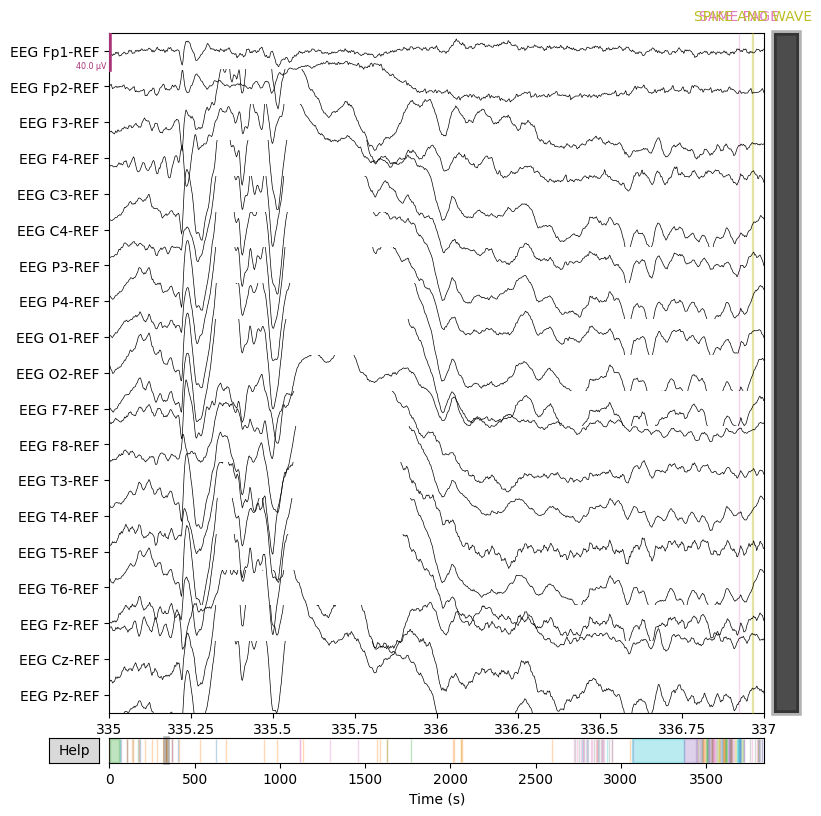

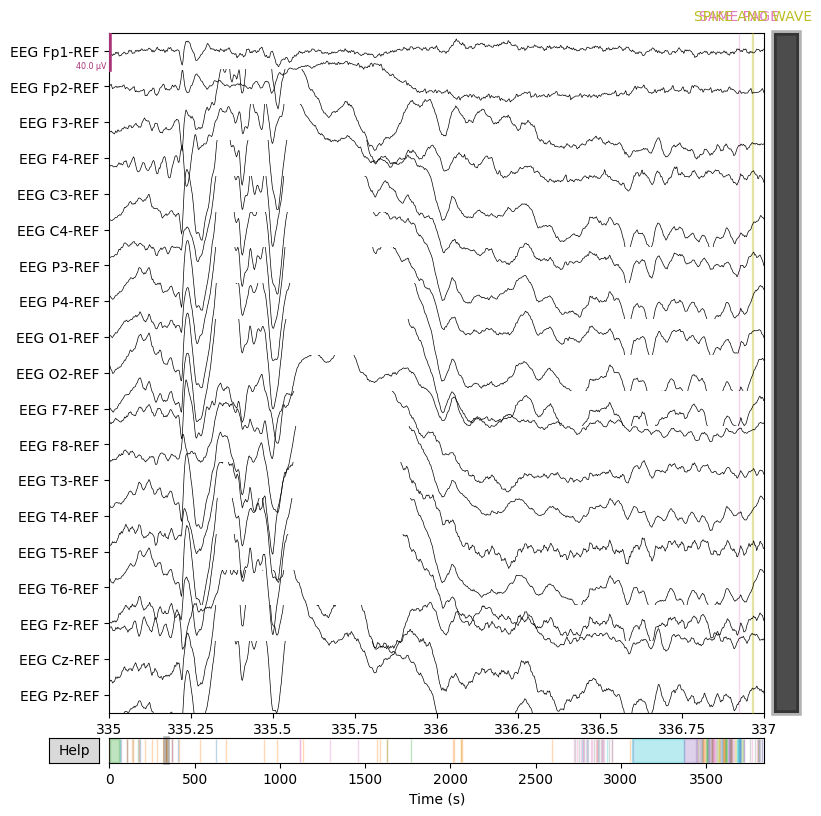

In [17]:
# Spike annotation in 270-271 seconds, but actual spike at 269-270 second
chan_idxs = [raw.ch_names.index(ch) for ch in CHANNEL_REMAIN]
raw.plot(duration=2, start=66+269, order=chan_idxs)

In [18]:
info = mne.create_info(CHANNEL_REMAIN, ch_types=['eeg'] * len(CHANNEL_REMAIN), sfreq=ORIGINAL_FREQUENCY))
raw = mne.io.RawArray(df_original.T, info)   
raw.info

Creating RawArray with float64 data, n_channels=19, n_times=1966592
    Range : 0 ... 1966591 =      0.000 ...  3840.998 secs
Ready.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,256.00 Hz


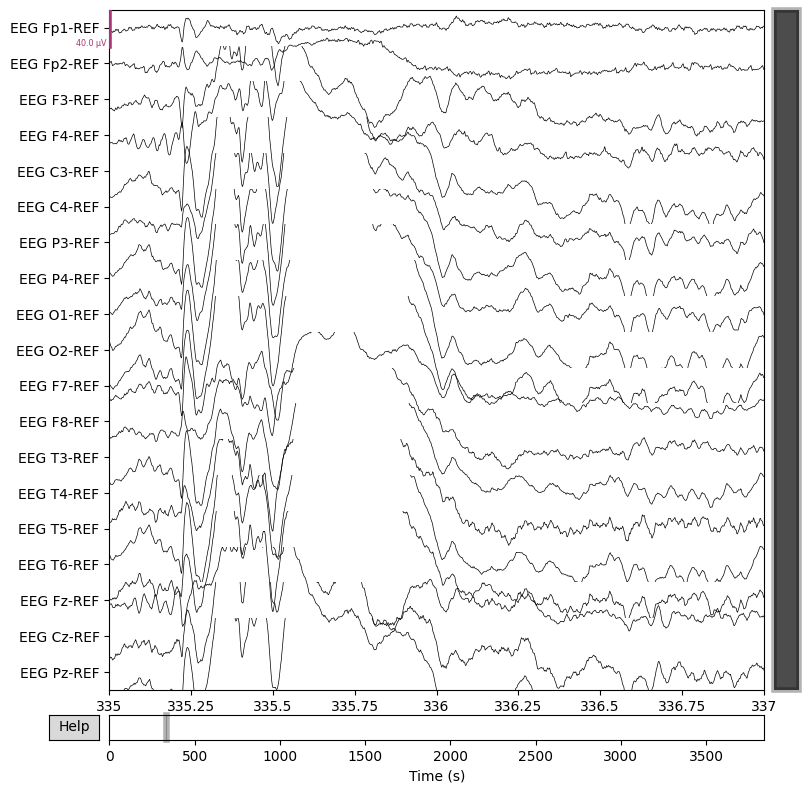

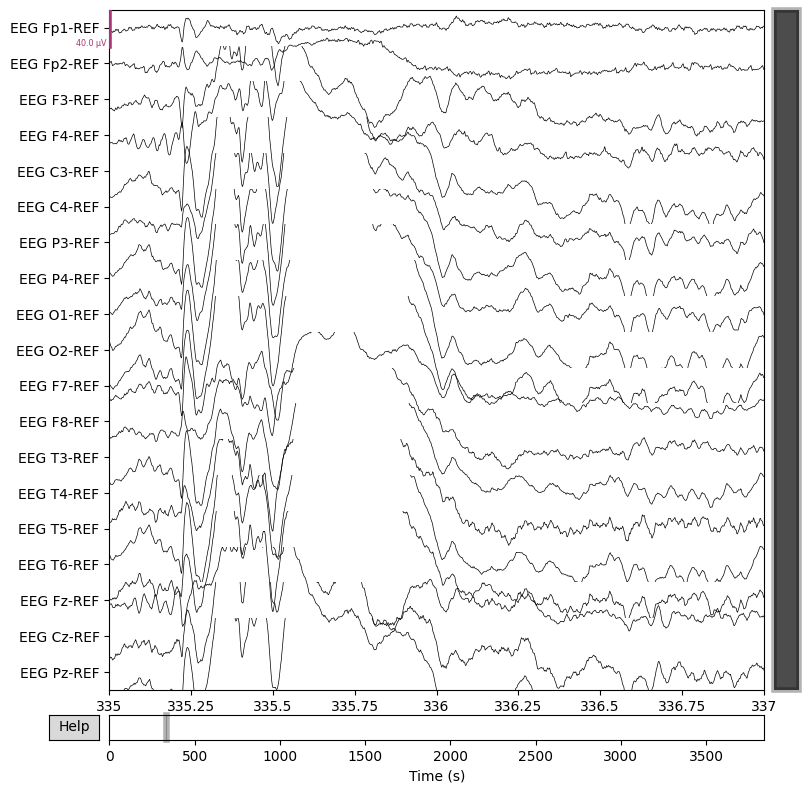

In [19]:
raw.plot(duration=2, start=66+269)

### Same plot using matplotlib

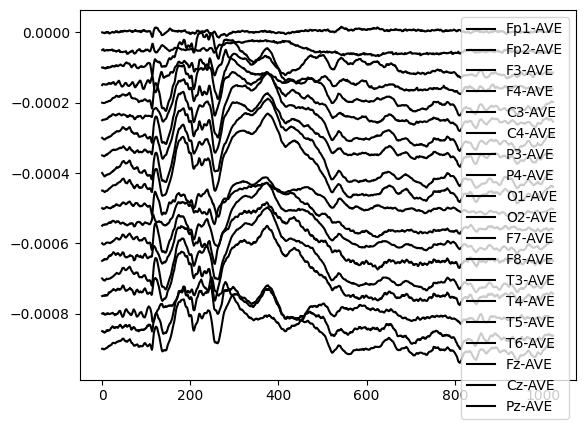

In [20]:
START_INDEX = int((66+269)*ORIGINAL_FREQUENCY)
END_INDEX   = int((66+271)*ORIGINAL_FREQUENCY)


if type(df_original) != np.ndarray:
    df_original = df_original.to_numpy()
seperate=5e-5
for i, col in enumerate(AVE_CHANNELS_NAME):
    plt.plot(df_original[START_INDEX:END_INDEX,i] - df_original[START_INDEX,i] -seperate*i, label=col, color="k")
    # axs[0].set_yticks([])
    plt.legend()

plt.show()